# Problem Set 2, due January 26 at 11:59am (i.e., noon).

**Please Note:** This assignment will likely take you a _long_ time, especially if you are new to Python. Start early!

## Introduction to the assignment

For this assignment, you will be using data from the [Progresa program](http://en.wikipedia.org/wiki/Oportunidades), a government social assistance program in Mexico. This program, as well as the details of its impact, are described in the paper "[School subsidies for the poor: evaluating the Mexican Progresa poverty program](http://www.sciencedirect.com/science/article/pii/S0304387803001858)", by Paul Shultz (available on Canvas). Please familiarize yourself with the PROGRESA program before beginning this problem set, so you have a rough sense of where the data come from and how they were generated. If you just proceed into the problem set without understanding Progresa or the data, it will be very difficult!

The goal of this problem set is to implement some of the basic econometric techniques that you are learning in class to measure the impact of Progresa on secondary school enrollment rates. The timeline of the program was:

 * Baseline survey conducted in 1997
 * Intervention begins in 1998, "Wave 1" of data collected in 1998
 * "Wave 2 of data" collected in 1999
 * Evaluation ends in 2000, at which point the control villages were treated. 
 
When you are ready, download the progresa_sample.csv data from Canvas. The data are actual data collected to evaluate the impact of the Progresa program.  In this file, each row corresponds to an observation taken for a given child for a given year. There are two years of data (1997 and 1998), and just under 40,000 children who are surveyed in each year. For each child-year observation, the following variables are collected:

| Variable name | Description|
|------|------|
|year	  |year in which data is collected
|sex	  |male = 1|
|indig	  |indigenous = 1|
|dist_sec |nearest distance to a secondary school|
|sc	      |enrolled in school in year of survey|
|grc      |grade enrolled|
|fam_n    |family size|
|min_dist |	min distance to an urban center|
|dist_cap |	min distance to the capital|
|poor     |	poor = 1|
|progresa |treatment =1|
|hohedu	  |years of schooling of head of household|
|hohwag	  |monthly wages of head of household|
|welfare_index|	welfare index used to classify poor|
|hohsex	|gender of head of household (male=1)|
|hohage	|age of head of household|
|age	|years old|
|folnum	|individual id|
|village|	village id|
|sc97	|schooling in 1997|

---

##Part 1: Descriptive analysis

### 1.1	Summary Statistics

Present summary statistics (mean and standard deviation) for all of the demographic variables in the dataset (i.e., everything except year, folnum, village). Present these in a single table alphabetized by variable name. Do NOT simply expect the grader to scroll through your output!

First, let us import the required packages and data

In [7]:
# Importing required packages
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.formula.api as smf
%matplotlib inline

# Importing the progresa data
pr = pd.read_csv('progresa_sample.csv')

# Let's view how our data looks
pr.head(5)

,year,sex,indig,dist_sec,sc,grc,fam_n,min_dist,dist_cap,poor,...,hohedu,hohwag,welfare_index,hohsex,hohage,age,village,folnum,grc97,sc97
0,97,0,0,4.473,1,7,7,21.168384,21.168384,pobre,...,6,0,583,1,35,13,163,1,7,1
1,98,0,0,4.473,1,8,7,21.168384,21.168384,pobre,...,6,0,583,1,35,14,163,1,7,1
2,97,1,0,4.473,1,6,7,21.168384,21.168384,pobre,...,6,0,583,1,35,12,163,2,6,1
3,98,1,0,4.473,1,7,7,21.168384,21.168384,pobre,...,6,0,583,1,35,13,163,2,6,1
4,97,0,0,4.473,1,2,7,21.168384,21.168384,pobre,...,6,0,583,1,35,8,163,3,2,1


Let us compute summary statistics for all demographic variables in the dataset except year, folnum and village

In [8]:
# Dropping the variables which are not required
pr_stats = pr.drop(['year', 'folnum', 'village'], axis = 1)

#Computing mean and standard deviation
progresa_mean = pd.DataFrame(pr_stats.mean().sort_index(ascending=True))
progresa_std = pd.DataFrame(pr_stats.std().sort_index(ascending=True))

# Converting to data frame
progresa_mean_std = pd.DataFrame(pd.concat([progresa_mean, progresa_std], axis=1, join='inner'))
progresa_mean_std.columns = ['Mean', 'Standard Deviation']

progresa_mean_std

,Mean,Standard Deviation
age,11.366460,3.167744
dist_cap,147.674452,76.063134
dist_sec,2.418910,2.234109
fam_n,7.215715,2.352900
grc,3.963537,2.499063
grc97,3.705372,2.572387
hohage,44.436717,11.620372
hohedu,2.768104,2.656106
hohsex,0.925185,0.263095
hohwag,586.985312,788.133664


### 1.2 Differences at baseline?

Are the baseline (1997) demographic characteristics **for the poor**  different in treatment and control villages? Hint: Use a T-Test to determine whether there is a statistically significant difference in the average values of each of the variables in the dataset. Focus only on the data from 1997 for individuals who are poor (i.e., poor=='pobre').

Present your results in a single table with the following columns and 14 (or so) rows:

| Variable name | Average value (Treatment villages) | Average value (Control villages) | Difference (Treat - Control) | p-value |
|------|------|------|------|------|
|Male|?|?|?|?|


Let us determine whether there is a statistically significant difference in the average values of the variables by using T-Test.

In [9]:
# Extracting only poor households for the year 1997
progresa_poor = pr[(pr['poor'] == 'pobre') & (pr['year'] == 97)]

# Segregating the treatment and control groups
p97_t = progresa_poor[progresa_poor['progresa'] != 'basal'].drop(['progresa','poor','year','folnum','village'], axis = 1)
p97_c = progresa_poor[progresa_poor['progresa'] == 'basal'].drop(['progresa','poor','year','folnum','village'], axis = 1)

# Computing mean
p97_t_mean = p97_t.mean()
p97_c_mean = p97_c.mean()
p97_diff_t_c = p97_t_mean - p97_c_mean

# Adding our mean values to a new data frame and creating new columns for T-Value and P-Value
p97_tc_mean = pd.DataFrame(pd.concat([p97_t_mean, p97_c_mean, p97_diff_t_c], axis=1, join='inner'))
p97_tc_mean.columns = ['Treatment(Avg)', 'Control(Avg)', 'Diff(Treat - Contr)']
p97_tc_mean['T_value'] = ""
p97_tc_mean['P_value'] = ""

# Computing the T-Value and P-Value using T-Test
for index in range(len(p97_tc_mean)):  
    ttest = scipy.stats.ttest_ind(p97_t.iloc[::,index:index+1].dropna(), p97_c.iloc[::,index:index+1].dropna())
    p97_tc_mean.iloc[index,3:4] = ttest[0]
    p97_tc_mean.iloc[index,4:5] = ttest[1]

p97_tc_mean.T_value = p97_tc_mean.T_value.str[0]
p97_tc_mean.P_value = p97_tc_mean.P_value.str[0]

p97_tc_mean.sort_index(ascending=True)

,Treatment(Avg),Control(Avg),Diff(Treat - Contr),T_value,P_value
age,10.742023,10.716991,0.025032,0.708630,4.785594e-01
dist_cap,153.769730,150.829074,2.940656,3.339081,8.415005e-04
dist_sec,2.507662,2.453122,0.054540,2.100433,3.569843e-02
fam_n,7.302469,7.281327,0.021142,0.794167,4.271039e-01
grc,3.543050,3.531599,0.011450,0.400196,6.890151e-01
grc97,3.543050,3.531599,0.011450,0.400196,6.890151e-01
hohage,44.276918,43.648828,0.628090,4.775962,1.796243e-06
hohedu,2.590348,2.663139,-0.072791,-2.541229,1.105093e-02
hohsex,0.922947,0.924656,-0.001709,-0.566312,5.711858e-01
hohwag,573.163558,544.339544,28.824015,3.594588,3.253835e-04


### 1.3 Interpretation

* A: Are there statistically significant differences between treatment and control villages as baseline? 
* B: Why does it matter if there are differences at baseline?
* C: What does this imply about how to measure the impact of the treatment?

#### Answer 1.3 A
We will consider the variables having P-value < 0.05 as statistically significant.
There are statistically significant differences between treatment and control villages at baseline for following demographic characteristics:
1. dist_cap
2. dist_sec
3. min_dist
4. hoh_age
5. hoh_edu
6. hoh_wag
7. sex
8. welfare_index

#### Answer 1.3 B
This experiment runs on the assumption that the villages for progresa have been randomly chosen. Hence, on an average, all demographic characteristics should cancel each other out.
If we find differences at the baseline, it would indicate that the experiment is NOT random and thus the results of the experiment would suffer from biases.

#### Answer 1.3 C
Since we have found differences, it would imply that the impact of the treatment would not be based only on the treatment but other factors (demographic characteristics) as well.


### 1.4 Graphical exploration, part 1

For each level of household head education, compute the average enrollment rate in 1997. Create a scatterplot that shows this relationship. What do you notice?

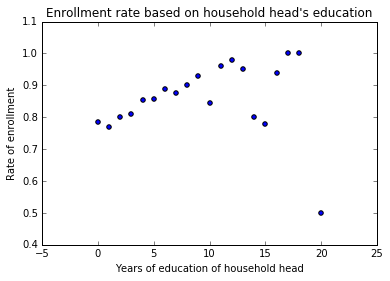

In [11]:
# Computing average enrollment rate based on groups of household head's education
headEdu_enroll_97 = pr[pr.poor == 'pobre'].groupby(['hohedu']).mean()
headEdu_enroll_97.reset_index(level=0, inplace=True)

# Plotting the scatter plot
plt.scatter(headEdu_enroll_97['hohedu'], headEdu_enroll_97['sc97'])
plt.xlabel('Years of education of household head')
plt.ylabel('Rate of enrollment')
plt.title('Enrollment rate based on household head\'s education')

#### Interpretation
From the graph we can see a very clear positive correlation wherein, with the increase in the number of years of education of the household head, the enrollment rate of the kid also increases. This confirms our intuition that educated parents are more likely to get their kids educated.

There are however a few outliers in our plot. One particularly interesting outlier is when years of education of household head is 20 years. This would suggest that the most educated parents do not send their kids to school and it is counter-intuitive. Let us do some more exploration to check the validity of this.

In [45]:
# Checking the number of samples at each level of house hold head education
pr.groupby('hohedu').size()

hohedu
0     22082
1      5280
2     11678
3     15162
4      5650
5      2494
6     10736
7       370
8       588
9      2194
10      106
11       84
12      364
13      152
14       88
15       66
16       74
17       30
18       48
20        4
dtype: int64

#### Answer 1.4

We see that we do not have many samples when the education of household head is 14 years or more. And all our outliers belong to this category.
Hence we can ignore the outliers on the basis of small sample size and conclude that there is a positive linear correlation between number of years of education of head of household and enrollment rate.

### 1.5 Graphical exploration, part 2

Create a histogram of village enrollment rates **among poor households in treated villages**, before and after treatment. Specifically, for each village, calculate the average rate of enrollment of poor households in treated villages in 1997, then compute the average rate of enrollment of poor households in treated villages in 1998. Create two separate histograms showing the distribution of these average enrollments rates, one histogram for 1997 and one histogram for 1998. On each histogram, draw a vertical line that intersects the x-axis at the average value (across all households). Does there appear to be a difference? Is this difference statistically significant?

Let us create histograms to explore enrollment rates among poor in villages before and after treatment

Pre Treatment Enrollment % (in 1997):  81.38394110596501 % 
Post Treatment Enrollment % (in 1997):  82.95362042630731 %
Difference in Pre and Post Treatment Enrollment:  1.5696793203423027 %


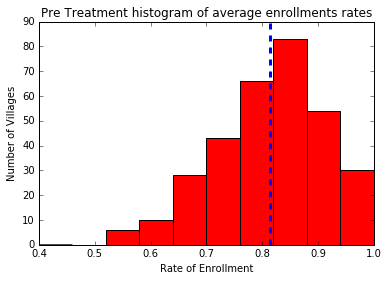

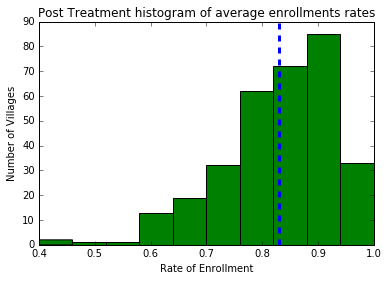

In [12]:
# Considering poor households in treated villages seperately, in 97 and 98 and grouping by villages
pre_treat_village =  pr[(pr.poor == 'pobre') & (pr.progresa == 'basal') & (pr.year == 97)].groupby('village').mean()
post_treat_village = pr[(pr.poor == 'pobre') & (pr.progresa == 'basal') & (pr.year == 98)].groupby('village').mean()

# Calculating mean enrollment rate
pre_treat_mean = pre_treat_village['sc'].mean()*100
post_treat_mean = post_treat_village['sc'].mean()*100
difference_in_mean = post_treat_mean - pre_treat_mean

# Plotting histograms for the average rate of enrollment of poor households in treated villages in 97 and 98
plt.figure(1)
plt.hist(pre_treat_village['sc'].values, color = 'r', range = [0.4,1])
plt.axvline(pre_treat_village['sc'].mean(), color = 'b', linestyle = 'dashed', linewidth = 3)
plt.xlabel('Rate of Enrollment')
plt.ylabel('Number of Villages')
plt.title('Pre Treatment histogram of average enrollments rates')

plt.figure(2)
plt.hist(post_treat_village['sc'].values, color = 'g', range = [0.4,1])
plt.axvline(post_treat_village['sc'].mean(), color = 'b', linestyle = 'dashed', linewidth = 3)
plt.xlabel('Rate of Enrollment')
plt.ylabel('Number of Villages')
plt.title('Post Treatment histogram of average enrollments rates')

print('Pre Treatment Enrollment % (in 1997): ', pre_treat_mean, '%',
      '\nPost Treatment Enrollment % (in 1997): ', post_treat_mean, '%'
      '\nDifference in Pre and Post Treatment Enrollment: ', difference_in_mean, '%',)

From the individual histograms we can see that the mean is close to each other and there is no major shift in the pattern. Let us plot these histograms together to evaluate them critically.

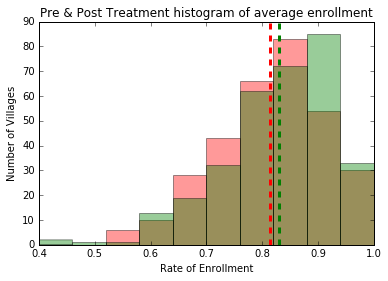

In [13]:
# Plotting overlapping histograms for the average rate of enrollment of poor households in treated villages in 97 and 98
plt.hist(pre_treat_village['sc'].values, color = 'r', alpha = 0.4, range = [0.4,1])
plt.axvline(pre_treat_village['sc'].mean(), color = 'r', linestyle = 'dashed', linewidth = 3)
plt.hist(post_treat_village['sc'].values, color = 'g', alpha = 0.4, range = [0.4,1])
plt.axvline(post_treat_village['sc'].mean(), color = 'g', linestyle = 'dashed', linewidth = 3)

plt.xlabel('Rate of Enrollment')
plt.ylabel('Number of Villages')
plt.title('Pre & Post Treatment histogram of average enrollment')

For the above, note that Pre Treatment effects are in red color, post treatment are in green color and the overlap is brown in color.
We do see some amount of change but to check if it is significant let us run a T-test.

In [14]:
tt_hist = scipy.stats.ttest_ind(post_treat_village['sc'].dropna(), pre_treat_village['sc'].dropna())
tt_hist

Ttest_indResult(statistic=2.0157134865156379, pvalue=0.04424870036572115)

#### Answer 1.5

From graphical exploration, we see that there is some difference in the average rate of enrollment of poor household in 97 and 98. There is a very clear right skew in the 98 data which indicates that the enrollments has increased.

When we check the actual numbers, there is an increase of 1.5% in the average rate of enrollment of poor household. On running the T-test we see that the p value is less than 0.05 which is why the difference is statistically significant.

## Part 2: Measuring Impact

Our goal is to estimate the causal impact of the PROGRESA program on the social and economic outcomes of individuals in Mexico. We will focus on the impact of the program on the poor (those with poor=='pobre'), since only the poor were eligible to receive the PROGRESA assistance.

### 2.1 Simple differences: T-test

Begin by estimating the impact of Progresa using "simple differences." Restricting yourself to data from 1998 (after treatment), calculate the average enrollment rate among **poor** households in the Treatment villages and the average enrollment rate among **poor** households in the control villages. Use a t-test to determine if this difference is statistically significant. What do you conclude?

In [15]:
# Extracting control and treatment groups
contr =   pr[(pr.year == 98) & (pr.poor == 'pobre') & (pr.progresa == '0')]
treat = pr[(pr.year == 98) & (pr.poor == 'pobre') & (pr.progresa == 'basal')]

# Calculating mean
treat_mean = treat['sc'].mean()
contr_mean = contr.sc.mean()

# Running T-Test
tt_contr_treat = scipy.stats.ttest_ind(treat['sc'].dropna(),contr['sc'].dropna())

# Adding to data frame
pd.DataFrame.from_items([('Control Mean', [contr_mean]), 
                         ('Treatment Mean', [treat_mean]), 
                         ('Difference', [treat_mean - contr_mean]),
                         ('T Value', [tt_contr_treat[0]]), ('P Value', [tt_contr_treat[1]])])

,Control Mean,Treatment Mean,Difference,T Value,P Value
0,0.807637,0.846479,0.038842,8.358721,6.636344e-17


#### Answer 2.1

After using simple difference to compare the rate of enrollment in treatment vs control village, we get a p-value of 6.63e-17 which is less than 0.05. This means that the probability of getting the difference we did because of random chance is only a miniscule 6.63e-17.
This is indication that that the difference is statistically significant.

If we only go by simple difference, we conclude that the treatment villages have a higher rate of enrollment in 1998 as compared to the control villages and this higher rate of enrollment is statistically significant.

### 2.2 Simple differences: Regression

Estimate the effects of Progresa on enrollment using a regression model, by regressing the 1998 enrollment rates **of the poor** on treatment assignment. Discuss the following:

* Based on this model, how much did Progresa increase the likelihood of a child enrolling?
* How does your regression estimate compare to your t-test estimate from part 2.1?
* Based on this regression model, can we reject the null hypothesis that the treatment effects are zero? 
* What is the counterfactual assumption underlying this regression?

In [16]:
# Considering only the poor from 1998
post_treat = pr[(pr.year == 98) & (pr.poor == 'pobre')]

# Fitting linear model
post_treat_model = smf.ols(formula = 'sc ~ progresa', data = post_treat).fit()

# post_treat_model.pvalues
post_treat_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     sc   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     69.87
Date:                Tue, 26 Jan 2016   Prob (F-statistic):           6.64e-17
Time:                        07:27:12   Log-Likelihood:                -11926.
No. Observations:               27450   AIC:                         2.386e+04
Df Residuals:                   27448   BIC:                         2.387e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
Intercept             0.8076      0.004    220.676      0.000         0.800     0.815
progresa[T.basal]     0.0388      0.005      8.359      0.000         0.030     0.048
==============================================================================
Omnibus:                     7638.939   Durbin-Watson:                   1.734
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15767.534
Skew:                          -1.767   Prob(JB):                         0.00
Kurtosis:                       4.140   Cond. No.                         3.01
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
# Standard error
post_treat_model.bse

Intercept            0.003660
progresa[T.basal]    0.004647
dtype: float64

#### Answer 2.2

#### Answer (a)
Based on the model, since the coefficient progresa is 0.0388, we can say that progresa improved the likelihood of a child getting enrolled in school by 0.038 times.

#### Answer (b)
Our regression parameter estimate(beta1) is the same as the t-test estimate from part 2.1. This is because in regression, computation of parameter beta1 involves taking difference of the observed value with the mean values and this is what we are doing in the t-test too.

#### Answer (c)
Our p-value is less than 0.05. This means that the probability of observing the same enrollment rate values if our treatment effect of progesa was zero is less than 0.05. In other words, we can say that we are more than 95% confident that the values of enrollment are owing to the treatment effect progresa had and not because of random chance. Hence we can reject the null hypothesis that the treatment effects are zero.

#### Answer (d)
The counterfactual assumption underlying this regression is that in the absence of treatment (in this case progresa) and any pre-existing trend, the rate of enrollment in the treatment villages would have been the same as the rate of enrollment in the control villages.

### 2.3 Multiple Regression

Re-run the above regression estimated but this time include a set of control variables. Include, for instance, age, distance to a secondary school, gender, education of household head, welfare index, indigenous, etc.

* How do the controls affect the point estimate of treatment effect?
* How do the controls affect the standard error on the treatment effect? 
* How do you interpret the differences (or similarities) between your estimates of 2.2 and 2.3?

In [17]:
# Considering only the poor from 1998
post_treat_multi = pr[(pr.year == 98) & (pr.poor == 'pobre')]

# Fitting multiple regression model
post_treat_multi = smf.ols(formula =
 'sc ~ progresa + dist_sec + hohedu + welfare_index + indig + dist_cap + min_dist', data = post_treat_multi).fit()

post_treat_multi.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     sc   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     107.5
Date:                Tue, 26 Jan 2016   Prob (F-statistic):          4.31e-156
Time:                        07:27:17   Log-Likelihood:                -11509.
No. Observations:               27276   AIC:                         2.303e+04
Df Residuals:                   27268   BIC:                         2.310e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
Intercept             0.8094      0.015     53.920      0.000         0.780     0.839
progresa[T.basal]     0.0353      0.005      7.631      0.000         0.026     0.044
dist_sec             -0.0093      0.001     -9.104      0.000        -0.011    -0.007
hohedu                0.0156      0.001     17.434      0.000         0.014     0.017
welfare_index        -0.0001   1.98e-05     -7.050      0.000        -0.000    -0.000
indig                 0.0184      0.005      3.369      0.001         0.008     0.029
dist_cap              0.0002   4.27e-05      3.898      0.000      8.27e-05     0.000
min_dist              0.0004   7.32e-05      5.236      0.000         0.000     0.001
==============================================================================
Omnibus:                     7212.133   Durbin-Watson:                   1.762
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14407.407
Skew:                          -1.699   Prob(JB):                         0.00
Kurtosis:                       4.066   Cond. No.                     4.64e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.64e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
#Standard error
post_treat_multi.bse

Intercept            0.015011
progresa[T.basal]    0.004626
dist_sec             0.001020
hohedu               0.000898
welfare_index        0.000020
indig                0.005452
dist_cap             0.000043
min_dist             0.000073
dtype: float64

#### Answer 2.3

#### Answer (a)
The controls which we have added have actually contributed in decreasing the point estimate of the treatment effect. This means that our treatment variable (progresa) was over estimating the treatment effect by considering the impact of other controls. On adding these controls, some of the treatment effect is explained by them because of which the impact of actual treatment variable is reduced.

#### Answer (b)
We see that the standard error has decreased from 0.004647 to 0.004626. That means adding additional controls has made our treatment variable more accurate.

#### Answrs (c)
One major difference betwen our estimates in 2.2 and 2.3 is the R-squared value. In single variable regression, the R-squared value is 0.003 and in the multiple variable regression, the R-squared value is 0.026. This indicates that adding additional controls has improved our model considerably and helped in explaining some additional variance.

### 2.4 Difference-in-Difference, version 1 (tabular)

Thus far, we have computed the effects of Progresa by estimating the difference in 1998 enrollment rates across villages. An alternative approach would be to compute the treatment effect using a difference-in-differences framework.

Begin by estimating the average treatment effects of the program for poor households using data from 1997 and 1998. Specifically, calculate the difference (between 1997 and 1998) in enrollment rates among poor households in treated villages; then compute the difference (between 1997 and 1998) in enrollment rates among poor households in control villages. The difference between these two differences is your estimate.

* What is your estimate of the impact, and how does it compare to your earlier (simple difference) results?
* What is the counterfactual assumption underlying this estimate? 


In [12]:
# Computing the means required for difference in difference
PreControl =    pr[(pr.poor == 'pobre') & (pr.year == 97) & (pr.progresa == '0')].mean()['sc']
PostControl =   pr[(pr.poor == 'pobre') & (pr.year == 98) & (pr.progresa == '0')].mean()['sc']
PreTreatment =  pr[(pr.poor == 'pobre') & (pr.year == 97) & (pr.progresa == 'basal')].mean()['sc']
PostTreatment = pr[(pr.poor == 'pobre') & (pr.year == 98) & (pr.progresa == 'basal')].mean()['sc']

ControlDiff =   PostControl - PreControl
TreatmentDiff = PostTreatment - PreTreatment
DiffInDiff =    TreatmentDiff - ControlDiff

# Arranging our means in data frame
diff_tab = {'Initial (Pre)':pd.Series([PreControl, PreTreatment, ControlDiff], index = ['Control', 'Treatment', 'Difference']),
       'Later (Post)':pd.Series([PostControl, PostTreatment, TreatmentDiff], index = ['Control', 'Treatment', 'Difference']),}

pd.DataFrame(diff_tab)

,Initial (Pre),Later (Post)
Control,0.815186,0.807637
Treatment,0.822697,0.846479
Difference,-0.007549,0.023782


In [14]:
print('Difference in Difference for Poor:', DiffInDiff)

Difference in Difference for Poor: 0.0313312803193


#### Answer 2.4

#### Answer(a)
We see that the estimate of the impact is 0.0313. We see that the impact has been reduced from 0.0388 (single variable linear regression) to 0.0366 (multiple variable linear regression) to now 0.0313 via the difference in difference estimate. This is because difference in difference actually reduces the over estimation of our previous model owing to time trend

#### Answer(b)
The counterfactual assumption underlying the estimate is that in the absence of treatment (in this case progresa), over a particular time, the rate of enrollment in the treatment villages would have been the same as the rate of enrollment in the control villages assuming the trend over time is constant.


### 2.5 Difference-in-Difference, version 1 (regression)

Now use a regression specification to estimate the average treatment effects of the program in a difference-in-differences framework. Include at least 5 control variables.

* What is your estimate of the impact of Progresa? Be very specific in interpreting your coefficients and standard errors, and make sure to specify exactly what units you are measuring and estimating.
* How do these estimates of the treatment effect compare to the estimates based on the simple difference?
* How do these estimates compare to the difference-in-difference estimates from 2.4 above? What accounts for these differences?
* What is the counterfactual assumption underlying this regression? 

In [15]:
# Filtering by poor and creating new column which will set time as 0 if it is 97 and 1 otherwise
DiD1 = pr[(pr.poor == 'pobre')]
DiD1['time'] = DiD1['year'] == 98

# Fitting difference in difference model using interaction between treatment and time
DiD1_model = smf.ols(formula = 
  'sc ~ progresa + dist_sec + hohedu + welfare_index + indig + dist_cap + min_dist + time + progresa*time', data = DiD1)
DiD1_fit = DiD1_model.fit()

# P-values
DiD1_fit.pvalues

C:\Users\Nelson\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


Intercept                          0.000000e+00
progresa[T.basal]                  2.748528e-01
time[T.True]                       1.376341e-01
progresa[T.basal]:time[T.True]     2.250304e-06
dist_sec                           5.463602e-31
hohedu                            2.864807e-135
welfare_index                      1.014889e-32
indig                              2.224066e-08
dist_cap                           3.532547e-07
min_dist                           4.216564e-13
dtype: float64

In [70]:
DiD1_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     sc   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     160.3
Date:                Tue, 26 Jan 2016   Prob (F-statistic):          2.75e-301
Time:                        05:01:50   Log-Likelihood:                -25424.
No. Observations:               58032   AIC:                         5.087e+04
Df Residuals:                   58022   BIC:                         5.096e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------------
Intercept                          0.8339      0.011     77.418      0.000         0.813     0.855
progresa[T.basal]                  0.0048      0.004      1.092      0.275        -0.004     0.013
time[T.True]                      -0.0075      0.005     -1.485      0.138        -0.017     0.002
progresa[T.basal]:time[T.True]     0.0304      0.006      4.730      0.000         0.018     0.043
dist_sec                          -0.0084      0.001    -11.583      0.000        -0.010    -0.007
hohedu                             0.0155      0.001     24.819      0.000         0.014     0.017
welfare_index                     -0.0002   1.38e-05    -11.920      0.000        -0.000    -0.000
indig                              0.0213      0.004      5.594      0.000         0.014     0.029
dist_cap                           0.0002   2.97e-05      5.093      0.000      9.31e-05     0.000
min_dist                           0.0004   5.12e-05      7.250      0.000         0.000     0.000
==============================================================================
Omnibus:                    14517.448   Durbin-Watson:                   1.420
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            28096.547
Skew:                          -1.648   Prob(JB):                         0.00
Kurtosis:                       3.873   Cond. No.                     4.95e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.95e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Answer 2.5

#### Answer(a)
The estimate of the impact of delta will be given by the parameter for the interaction variables, in this case, progresa(control / treatment) and time (pre vs post). We see that the value of the parameter is 0.0307. The unit of this variable is the rate of enrollment over time.

#### Answer(b)
The estimates based on difference in difference indicate that the impact of treatment effect (progresa) from being significant in the simple difference method have ceased to be statistically significant in the difference in difference method. In its place, now, we have the interaction variable (difference in groups over time) which has become significant (p value of less than 0.05). The p value of other controls is approximately similar.

#### Answer(c)
The tabular computation of difference in difference yielded parameter value of 0.0313 while the linear regression model gave the value 0.0307. This indicates that the impact of the interaction variable has decreased owing to the control variables i.e the control variables decrease the slight over estimation made by our difference in difference model.

#### Answer(d)
The counterfactual assumption underlying the regression is that in the absence of treatment (in this case progresa) and controls (such as hohed, indig etc), over a particular time,  the rate of enrollment in the treatment villages would have been the same as the rate of enrollment in the control villages assuming the trend over time is constant.


### 2.6 Difference-in-Difference, version 2

In the previous problem, you estimated a difference-in-differences model that compared changes in enrollment rates over time across treatment and control villages. An alternative approach would be to compare enrollment rates in 1998 between poor and non-poor across treatment and control villages. 

* How would we estimate this version of the treatment effects in a regression model? 
* What is the counterfactual assumption underlying this regression?
* How do these treatment effects compare to the estimates above?
* Discuss some possible explanations for differences or similarities 

In [17]:
# Filtering by poor and creating new column which will set time as 0 if it is 97 and 1 otherwise
DiD2 = pr[(pr.year == 98)]
DiD2['poverty'] = DiD2['poor'] == 'pobre'

# Fitting difference in difference model using interaction between treatment and time
DiD2_model = smf.ols(formula = 
  'sc ~ progresa + dist_sec + hohedu + welfare_index + indig + dist_cap + min_dist + progresa*poverty', data = DiD2)
DiD2_fit = DiD2_model.fit()

# P-values
DiD2_fit.pvalues

C:\Users\Nelson\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


Intercept                            0.000000e+00
progresa[T.basal]                    4.384071e-02
poverty[T.True]                      4.465635e-01
progresa[T.basal]:poverty[T.True]    2.798756e-01
dist_sec                             3.500183e-22
hohedu                               3.489984e-90
welfare_index                        7.780375e-08
indig                                2.989238e-04
dist_cap                             2.108236e-07
min_dist                             8.248137e-07
dtype: float64

In [18]:
DiD2_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     sc   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     106.5
Date:                Tue, 26 Jan 2016   Prob (F-statistic):          1.64e-197
Time:                        07:11:47   Log-Likelihood:                -13792.
No. Observations:               31892   AIC:                         2.760e+04
Df Residuals:                   31882   BIC:                         2.769e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------------
Intercept                             0.7709      0.019     40.501      0.000         0.734     0.808
progresa[T.basal]                     0.0226      0.011      2.016      0.044         0.001     0.045
poverty[T.True]                       0.0079      0.010      0.761      0.447        -0.012     0.028
progresa[T.basal]:poverty[T.True]     0.0131      0.012      1.081      0.280        -0.011     0.037
dist_sec                             -0.0094      0.001     -9.692      0.000        -0.011    -0.007
hohedu                                0.0162      0.001     20.201      0.000         0.015     0.018
welfare_index                     -9.853e-05   1.83e-05     -5.373      0.000        -0.000 -6.26e-05
indig                                 0.0188      0.005      3.617      0.000         0.009     0.029
dist_cap                              0.0002   4.06e-05      5.191      0.000         0.000     0.000
min_dist                              0.0003   6.87e-05      4.930      0.000         0.000     0.000
==============================================================================
Omnibus:                     7998.393   Durbin-Watson:                   1.768
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15486.221
Skew:                          -1.646   Prob(JB):                         0.00
Kurtosis:                       3.900   Cond. No.                     7.83e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.83e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Answer 2.6

#### Answer(a)
We would estimate this version of the treatment effect by using the interaction between the treatment (progresa) and another binary variable poverty which we will either set to 1 or 0 depending on whether the household is non poor or poor.

#### Answer(b)
The counterfactual assumption underlying the regression is that in the absence of treatment (in this case progresa) and controls (such as hohed, indig etc), for poor as well as non poor group,  the rate of enrollment in the treatment villages would have been the same as the rate of enrollment in the control villages assuming the trend over time is constant.

#### Answer(c)
The R-squared value of this model is 0.029 compared to 0.024 for the model before this. This treatment effect in this model thus explains a little more variance than the previous model. This variable is explained by the treatment progresa rather than the interaction variable as we saw in the previous model.
However, like the the time variable in the previous model, the effect of poverty variable in this case when we consider difference between poor and non-poor households continues to remain statistically insignificant 

#### Answer(d)
We see similarity in our current model as well as previous model in terms of the additional effect we introduced (time in previous model and poverty in this model) by themselves remaining insignificant. 

However the previous model which considers interaction with time has statistically significant interaction effect (between time and progresa) whereas the interaction effect in this model (between poverty and progresa) is not statistically significant. Another difference is that in our current model, progresa on its own is statistically significant but in our previous model, progresa on its own is not statistically significant.

### 2.7 Spillover effects (extra credit)

Thus far, we have focused on the impact of PROGRESA on poor households. Repeat your analysis in 2.5, instead focusing on the impact of PROGRESA on non-poor households. 
* A: Describe one or two reasons why PROGRESA might have impacted non-poor households.
* B: Do you observe any impacts of PROGRESA on the non-poor?

In [19]:
# Filtering by no poor and creating new column which will set time as 0 if it is 97 and 1 otherwise
DiD3 = pr[(pr.poor == 'no pobre')]
DiD3['time'] = DiD3['year'] == 98

# Fitting difference in difference model using interaction between treatment and time
DiD3_model = smf.ols(formula = 
  'sc ~ progresa + dist_sec + hohedu + welfare_index + indig + dist_cap + min_dist + progresa*time', data = DiD3)
DiD3_fit = DiD3_model.fit()

# P-values
DiD3_fit.pvalues

C:\Users\Nelson\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


Intercept                         3.476881e-85
progresa[T.basal]                 2.269753e-02
time[T.True]                      2.389437e-01
progresa[T.basal]:time[T.True]    8.225313e-01
dist_sec                          6.742426e-13
hohedu                            1.423653e-44
welfare_index                     7.193438e-02
indig                             1.437127e-01
dist_cap                          1.029022e-09
min_dist                          6.761989e-01
dtype: float64

In [82]:
DiD3_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     sc   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     47.46
Date:                Tue, 26 Jan 2016   Prob (F-statistic):           1.44e-84
Time:                        06:23:32   Log-Likelihood:                -5187.8
No. Observations:               10336   AIC:                         1.040e+04
Df Residuals:                   10326   BIC:                         1.047e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------------
Intercept                          0.6209      0.031     19.742      0.000         0.559     0.683
progresa[T.basal]                  0.0247      0.011      2.279      0.023         0.003     0.046
time[T.True]                       0.0148      0.013      1.178      0.239        -0.010     0.039
progresa[T.basal]:time[T.True]    -0.0036      0.016     -0.224      0.823        -0.035     0.028
dist_sec                          -0.0148      0.002     -7.194      0.000        -0.019    -0.011
hohedu                             0.0176      0.001     14.074      0.000         0.015     0.020
welfare_index                   5.927e-05   3.29e-05      1.800      0.072     -5.28e-06     0.000
indig                              0.0177      0.012      1.462      0.144        -0.006     0.041
dist_cap                           0.0005   8.85e-05      6.111      0.000         0.000     0.001
min_dist                       -5.645e-05      0.000     -0.418      0.676        -0.000     0.000
==============================================================================
Omnibus:                     1825.169   Durbin-Watson:                   1.491
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3010.871
Skew:                          -1.322   Prob(JB):                         0.00
Kurtosis:                       2.951   Cond. No.                     7.27e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.27e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Answer 2.7

#### Answer(a)
Progresa might have impacted non-poor household because:
Some non-poor people who were not sending their kids to school might have feared that their kids would be left behind the poor kids who were going to school and would have been encouraged to send their kids to school as well.

#### Answer(b)
We see that for the interaction variable, the time variable as well as the treatment variable, the p value is greater than 0.05 and this is not statistically significant. Hence we can conclude that Progresa did not make any significant impact on the non-poor.

### 2.8 Summary

Based on all the analysis you have undertaken to date, do you believe that Progresa had a causal impact on the enrollment rates of poor households in Mexico?

#### Answer 2.8
If we see in the single difference model, we see that the treatment (progresa) is significant and the parameter estimate is 0.0388. As we moved along to the single difference model with multiple controls we saw that the treatment continued to remain significant even though the impact reduced slightly with the parameter estimate now 0.035. The explained variance however increased because of the additional control variables from 0.003 to 0.027.

We know that for the single difference method, there might have been over estimation of the treatment effect because of the time trend. In order to verify this, we computed the double difference for the treatment and control groups over time - from 97 to 98. On doing this, we saw that the treatment variable and time on their own were not statisitically significant, however, the interaction variable i.e. the interaction between time(97/98) and group(treatment/control) was statistically significant with delta parameter of 0.030. Thus, the model confirmed that there indeed was an effect of progresa on the rate of enrollment over time. The explained variance in this case was 0.024 which explained almost as much variance as our single difference model.

Moreover, on checking the double difference for interaction between the treatment and poverty, we found that there was no statistically significant realtionship confirming our intuition that introducing progresa over time helped increase the enrollment rate.

Thus, based on the analysis, I do believe that progresa had a CORRELATION on the enrollment rates of the poor households in Mexico.
This was NOT a causal impact becaust there are too many assumptions such as:
1. We are assuming parallel trends. This may or may not be true
2. We are assuming that the experiment was perfectly randomized. This may or may not be true.